In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

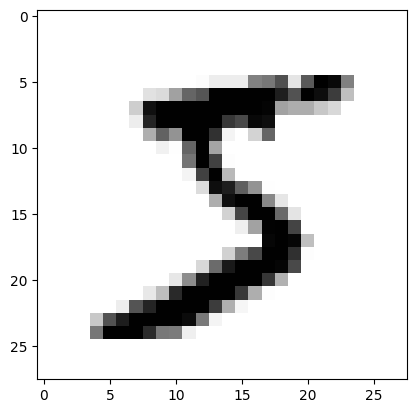

In [137]:
X, y = mnist['data'], mnist['target']

X_0 = X.iloc[0].values
X_0_reshape = X_0.reshape(28, 28)

plt.imshow(X_0_reshape, cmap='binary')
plt.show()



In [138]:
y = y.astype(np.uint8)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]



In [139]:
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)


In [140]:
from sklearn.linear_model import SGDClassifier

sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train, y_train_1)

X_predict = X_test.iloc[0:21]
y_predict = y_test[0:21]

prediction = sdg_clf.predict(X_predict)


In [141]:

print(f"prediction : {prediction}")
print(f"actual: {y_predict}")

prediction : [False False  True False False  True False  True False False False False
 False False  True False False False False False False]
actual: 60000    7
60001    2
60002    1
60003    0
60004    4
60005    1
60006    4
60007    9
60008    5
60009    9
60010    0
60011    6
60012    9
60013    0
60014    1
60015    5
60016    9
60017    7
60018    3
60019    4
60020    9
Name: class, dtype: uint8


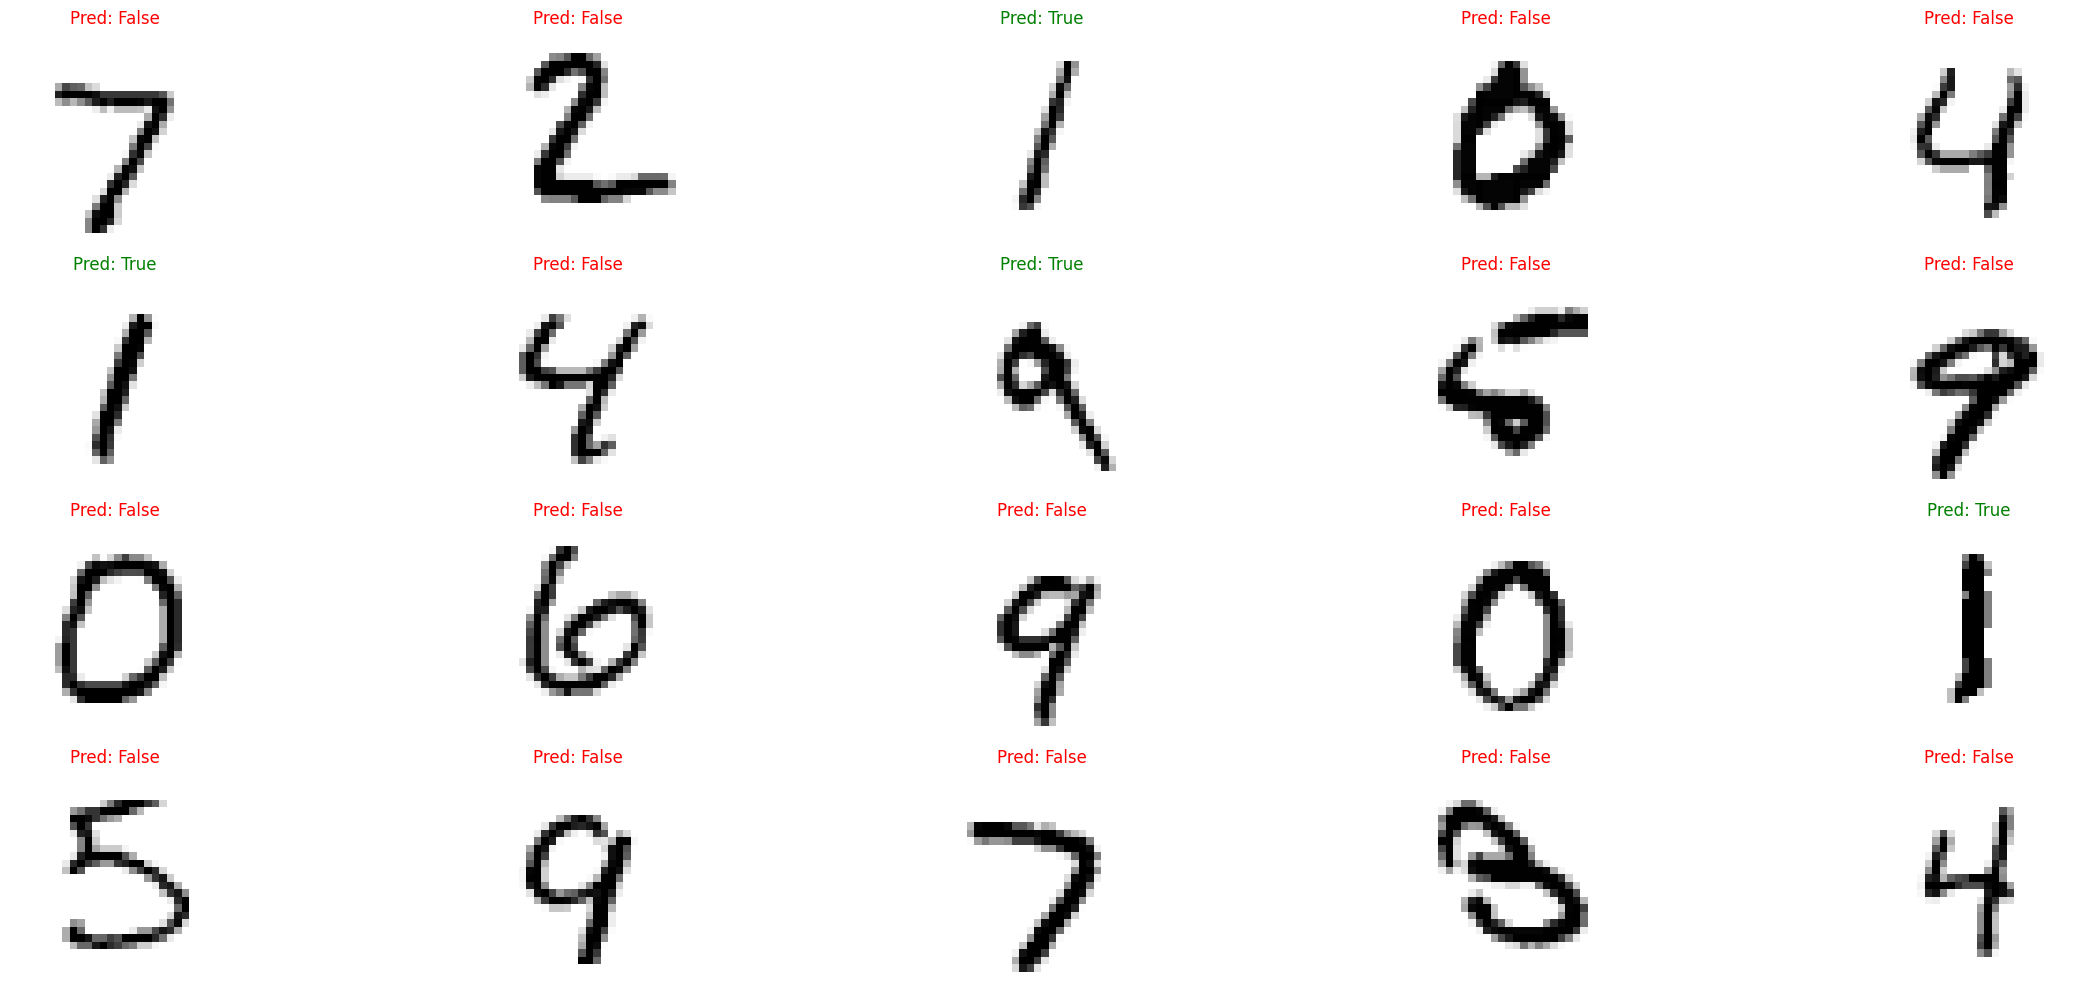

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    
    # Reshape the image for display
    image = X_predict.iloc[i].values.reshape(28, 28)
    
    plt.imshow(image, cmap="binary")
    
    # Determine color: green if correct, red if wrong
    color = "green" if prediction[i] else "red"
    
    plt.title(f"Pred: {prediction[i]}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_1):
    clone_clf = clone(sdg_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_1[train_index]
    X_test_folds = X_test.iloc[test_index]
    y_test_folds = y_test_1[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(f'{n_correct/ len(y_pred)}')

IndexError: positional indexers are out-of-bounds